# Python Excercise :  Simple Linear Regression

In [2]:
#Library

import statsmodels.api as sm
import seaborn as sns
from statsmodels.api import OLS
import matplotlib.pyplot as plt

## __Tips Dataset__

Dataset Description:
Food servers’ tips in restaurants may be influenced by many factors, including the nature of the restaurant, size of the party, and table locations in the restaurant. Restaurant managers need to know which factors matter when they assign tables to food servers. For the sake of staff morale, they usually want to avoid either the substance or the appearance of unfair treatment of the servers, for whom tips (at least in restaurants in the United States) are a major component of pay. In one restaurant, a food server recorded the following data on all customers they served during an interval of two and a half months in early 1990. The restaurant, located in a suburban shopping mall, was part of a national chain and served a varied menu. In observance of local law, the restaurant offered to seat in a non-smoking section to patrons who requested it. Each record includes a day and time, and taken together, they show the server’s work schedule.

From This information we frame the problem :
1. Problem Statements : How migh we predict tips that will be recieved by food servers so we can minimize unfair treatment ?
1. Data :
  1. Label : Tips
  1. Features : Total Bill
1. ML Objective : Minimize the appearance of unfair treatment of the food servers, for whom tips are major component of pay.
1. Action : Make food servers allocation 
1. Value : the sake of staff morale

In [3]:
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


## __EDA__

To Understand Our Data:
- descriptive statistics
- correlation
- graphical summary

In [4]:
df = tips[['total_bill', 'tip']]
df

,total_bill,tip
0,16.99,1.01
1,10.34,1.66
2,21.01,3.50
3,23.68,3.31
4,24.59,3.61
...,...,...
239,29.03,5.92
240,27.18,2.00
241,22.67,2.00
242,17.82,1.75


In [5]:
df.describe()

,total_bill,tip
count,244.000000,244.000000
mean,19.785943,2.998279
std,8.902412,1.383638
min,3.070000,1.000000
25%,13.347500,2.000000
50%,17.795000,2.900000
75%,24.127500,3.562500
max,50.810000,10.000000


In [6]:
df.corr()

,total_bill,tip
total_bill,1.000000,0.675734
tip,0.675734,1.000000


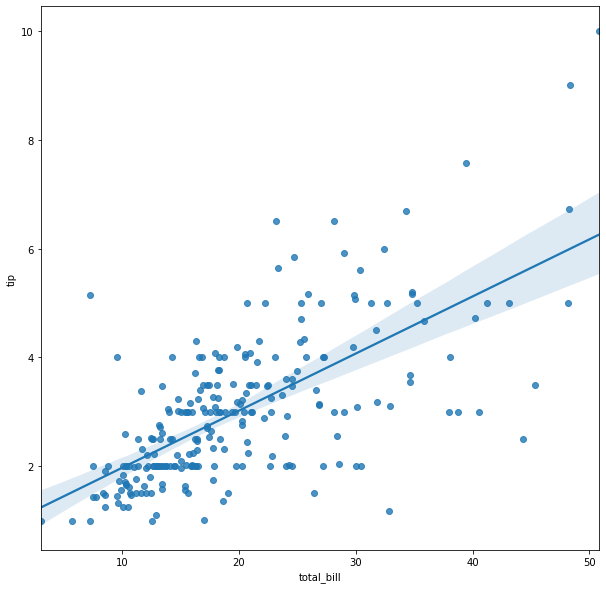

In [7]:
plt.figure(figsize=(10,10))
sns.regplot(x = 'total_bill', y = 'tip', data=df)
plt.show()

## __OLS__

We start to apply simple linear regression to the dataset:
- Y : Tips
- x : Total Bill

In [8]:
sm_lm = OLS(df['tip'], sm.add_constant(df[['total_bill']]))
result = sm_lm.fit()

In [9]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Sun, 07 Feb 2021   Prob (F-statistic):           6.69e-34
Time:                        12:26:29   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9203      0.160      5.761      0.0

## __Interpretation__

F-Test:
<br>
B1 : P-Value of the Simultant test (Prob (F-statistics)) is below 0.05. We have enough evidence that totall bill affect tip that given to the food servers.
<br>
Partial Test:
1. B0 : P-Value of the partial test is below 0.05. B0 is the condition when total bill has value of zero. in this case, it doesn't make sense that if there is people who paid food freely. So, the interpretation is the model still need B0. 
1. B1 : P-Value of the partial test is below 0.05. With significant level of 5%, we have enough evidence that higher total bill increase tip that given to the food servers

Parameter Estimate:
1. B0 = 0.9203 : This is not need to be interpreted because there is no people that paid free (x = 0) and 0 also fall outside 3.07 Dollar - 50.81 Dollar interval
1. B1 = 0.1050 : When the total bill increase 1 Dollar, the tip will increase about 0.1050 Dollar or When the total bill increase 10 Dollar, the tip will increase about 1.05 Dollar (*This interpretation only recommended when total bill fall between 3.07 Dollar and 50.81 Dollar) 
1. It is strongly recommended to interprete within the interval of predictor.

Coefficient Determination:
<br>
R-Square = 45.7% : This model can explain 45.7% variation of tips.

In [10]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

scaler = StandardScaler()
std_df = df.copy()
scaler.fit(std_df)
std_df = scaler.transform(std_df)
std_df = pd.DataFrame(std_df, columns=df.columns)
std_df

,total_bill,tip
0,-0.314711,-1.439947
1,-1.063235,-0.969205
2,0.137780,0.363356
3,0.438315,0.225754
4,0.540745,0.443020
...,...,...
239,1.040511,2.115963
240,0.832275,-0.722971
241,0.324630,-0.722971
242,-0.221287,-0.904026


In [11]:
std_df[(std_df['total_bill']>2) | (std_df['total_bill']<-2)]

,total_bill,tip
23,2.210010,3.318164
56,2.051300,0.001247
59,3.206166,2.702579
95,2.294430,1.254144
102,2.759302,-0.360862
112,2.058054,0.725464
142,2.409241,1.449682
156,3.194910,1.449682
170,3.492068,5.070772
182,2.877490,0.363356


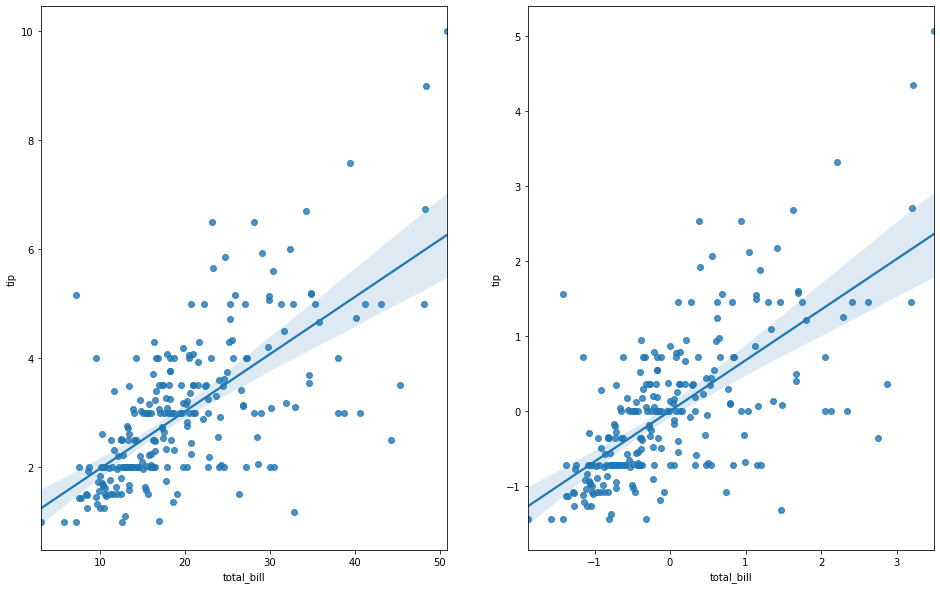

In [12]:
plt.figure(figsize=(16,10))
plt.subplot(121)
sns.regplot(x='total_bill', y='tip', data=df)

plt.subplot(122)
sns.regplot(x='total_bill', y='tip', data=std_df)

plt.show()

In [13]:
df.corr()

,total_bill,tip
total_bill,1.000000,0.675734
tip,0.675734,1.000000


In [14]:
std_df.corr()

,total_bill,tip
total_bill,1.000000,0.675734
tip,0.675734,1.000000


In [15]:
#statsmodels_linearmodel_standardized
sm_lm_std = OLS(std_df['tip'], sm.add_constant(std_df[['total_bill']]))
result_std = sm_lm_std.fit()
print(result_std.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Sun, 07 Feb 2021   Prob (F-statistic):           6.69e-34
Time:                        12:26:32   Log-Likelihood:                -271.81
No. Observations:                 244   AIC:                             547.6
Df Residuals:                     242   BIC:                             554.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        2.81e-16      0.047   5.93e-15      1.0

In [16]:
std_df.describe()

,total_bill,tip
count,2.440000e+02,2.440000e+02
mean,-6.597637e-17,2.846297e-16
std,1.002056e+00,1.002056e+00
min,-1.881547e+00,-1.447189e+00
25%,-7.247111e-01,-7.229713e-01
50%,-2.241005e-01,-7.117518e-02
75%,4.886857e-01,4.086192e-01
max,3.492068e+00,5.070772e+00


b = r*(Sy/Sx)

- r = pearson correlation coeficient
- Sy = Standard Deviation of y variable
- Sx = Standard Deviation of x variable

In [17]:
r_pearson = std_df.corr()['tip'][0]
std_bill = std_df.describe()['total_bill'][2]
std_tip = std_df.describe()['tip'][2]

r_pearson*(std_tip/std_bill)

0.6757341092113647

In [18]:
r = df.corr()['tip'][0]
bill = df.describe()['total_bill'][2]
tip = df.describe()['tip'][2]

r*(tip/bill)

0.10502451738435341

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# from sklearn.model_selection import train_test_split

In [20]:
x = tips[['total_bill']] # predictor, dalam bentuk 2 dimensi / dataframe
y = tips['tip'] # target / dependent variable, dalam bentuk 1 dimensi / Series

# x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=2021, test_size=.2)

lr = LinearRegression()
lr.fit(x, y) # training the model

LinearRegression()

In [21]:
b1 = lr.coef_
b1

array([0.10502452])

In [22]:
b0 = lr.intercept_
b0

0.9202696135546731

In [23]:
lr.score(x,y) # R2 score

0.45661658635167657

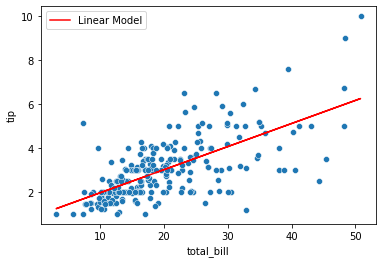

In [24]:
sns.scatterplot(x='total_bill', y='tip', data=tips)
plt.plot(tips['total_bill'], [b0+(b1*i) for i in tips['total_bill']], color='red', label='Linear Model')
plt.legend()
plt.show()

In [28]:
x

,total_bill
0,16.99
1,10.34
2,21.01
3,23.68
4,24.59
...,...
239,29.03
240,27.18
241,22.67
242,17.82


In [30]:
0.92+0.105*17

2.705

In [25]:
y_pred = lr.predict(x)
tips['prediction'] = y_pred
tips

,total_bill,tip,sex,smoker,day,time,size,prediction
0,16.99,1.01,Female,No,Sun,Dinner,2,2.704636
1,10.34,1.66,Male,No,Sun,Dinner,3,2.006223
2,21.01,3.50,Male,No,Sun,Dinner,3,3.126835
3,23.68,3.31,Male,No,Sun,Dinner,2,3.407250
4,24.59,3.61,Female,No,Sun,Dinner,4,3.502822
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,3.969131
240,27.18,2.00,Female,Yes,Sat,Dinner,2,3.774836
241,22.67,2.00,Male,Yes,Sat,Dinner,2,3.301175
242,17.82,1.75,Male,No,Sat,Dinner,2,2.791807


In [25]:
mse = mean_squared_error(tips['tip'], tips['prediction'])
mse

1.036019442011377

In [26]:
rmse = np.sqrt(mse)
rmse

1.0178504025697377

In [27]:
tips['xi-mean'] = tips['total_bill'] - np.mean(tips['total_bill'])
tips

,total_bill,tip,sex,smoker,day,time,size,prediction,xi-mean
0,16.99,1.01,Female,No,Sun,Dinner,2,2.704636,-2.795943
1,10.34,1.66,Male,No,Sun,Dinner,3,2.006223,-9.445943
2,21.01,3.50,Male,No,Sun,Dinner,3,3.126835,1.224057
3,23.68,3.31,Male,No,Sun,Dinner,2,3.407250,3.894057
4,24.59,3.61,Female,No,Sun,Dinner,4,3.502822,4.804057
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,3.969131,9.244057
240,27.18,2.00,Female,Yes,Sat,Dinner,2,3.774836,7.394057
241,22.67,2.00,Male,Yes,Sat,Dinner,2,3.301175,2.884057
242,17.82,1.75,Male,No,Sat,Dinner,2,2.791807,-1.965943


In [28]:
tips['(xi-mean)squared'] = tips['xi-mean']**2
tips

,total_bill,tip,sex,smoker,day,time,size,prediction,xi-mean,(xi-mean)squared
0,16.99,1.01,Female,No,Sun,Dinner,2,2.704636,-2.795943,7.817295
1,10.34,1.66,Male,No,Sun,Dinner,3,2.006223,-9.445943,89.225832
2,21.01,3.50,Male,No,Sun,Dinner,3,3.126835,1.224057,1.498316
3,23.68,3.31,Male,No,Sun,Dinner,2,3.407250,3.894057,15.163683
4,24.59,3.61,Female,No,Sun,Dinner,4,3.502822,4.804057,23.078967
...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,3.969131,9.244057,85.452597
240,27.18,2.00,Female,Yes,Sat,Dinner,2,3.774836,7.394057,54.672084
241,22.67,2.00,Male,Yes,Sat,Dinner,2,3.301175,2.884057,8.317787
242,17.82,1.75,Male,No,Sat,Dinner,2,2.791807,-1.965943,3.864930


In [29]:
std_b1 = rmse / np.sqrt(np.sum(tips['(xi-mean)squared']))
std_b1

0.007334544177444975

In [30]:
t_stats = b1 / std_b1
t_stats

array([14.31916079])

In [31]:
std_df

,total_bill,tip
0,-0.314711,-1.439947
1,-1.063235,-0.969205
2,0.137780,0.363356
3,0.438315,0.225754
4,0.540745,0.443020
...,...,...
239,1.040511,2.115963
240,0.832275,-0.722971
241,0.324630,-0.722971
242,-0.221287,-0.904026


In [32]:
clean_std = std_df[std_df['total_bill']<2.5]
clean_std.head()

,total_bill,tip
0,-0.314711,-1.439947
1,-1.063235,-0.969205
2,0.137780,0.363356
3,0.438315,0.225754
4,0.540745,0.443020


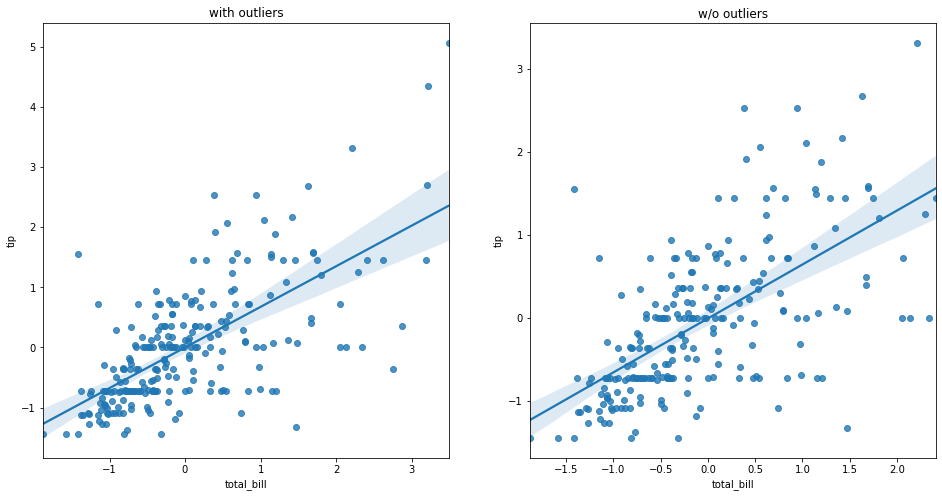

In [33]:
plt.figure(figsize=(16,8))
plt.subplot(121)
plt.title('with outliers')
sns.regplot(x='total_bill', y='tip', data=std_df)

plt.subplot(122)
plt.title('w/o outliers')
sns.regplot(x='total_bill', y='tip', data=clean_std)

plt.show()

In [34]:
sm_lm_clean = OLS(clean_std['tip'], sm.add_constant(clean_std[['total_bill']]))
result_std = sm_lm_clean.fit()
print(result_std.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     156.5
Date:                Thu, 14 Jan 2021   Prob (F-statistic):           7.29e-28
Time:                        20:00:34   Log-Likelihood:                -247.51
No. Observations:                 237   AIC:                             499.0
Df Residuals:                     235   BIC:                             506.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0047      0.045     -0.105      0.9

In [35]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Thu, 14 Jan 2021   Prob (F-statistic):           6.69e-34
Time:                        20:00:34   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9203      0.160      5.761      0.0

In [36]:
x_std = std_df[['total_bill']]
y_std = std_df['tip']

lr_std = LinearRegression()
lr_std.fit(x_std, y_std)

LinearRegression()

In [37]:
std_df.corr()

,total_bill,tip
total_bill,1.000000,0.675734
tip,0.675734,1.000000


In [38]:
std_df.describe()

,total_bill,tip
count,2.440000e+02,2.440000e+02
mean,-6.597637e-17,2.846297e-16
std,1.002056e+00,1.002056e+00
min,-1.881547e+00,-1.447189e+00
25%,-7.247111e-01,-7.229713e-01
50%,-2.241005e-01,-7.117518e-02
75%,4.886857e-01,4.086192e-01
max,3.492068e+00,5.070772e+00


In [39]:
lr_std.coef_

array([0.67573411])

In [40]:
lr_std.intercept_

3.371174017962645e-16

In [41]:
tips['total_bill'].describe()

count    244.000000
mean      19.785943
std        8.902412
min        3.070000
25%       13.347500
50%       17.795000
75%       24.127500
max       50.810000
Name: total_bill, dtype: float64

In [42]:
scaler = StandardScaler()
scaler.fit(tips[['total_bill']])

StandardScaler()

In [43]:
scaler_y = StandardScaler()
scaler_y.fit(tips[['tip']])

StandardScaler()

In [44]:
bill = 36.5
z = scaler.transform([[bill]])
tip = lr_std.predict(z)
tip

array([1.27128177])

In [45]:
scaler_y.inverse_transform([tip])

array([[4.7536645]])

Best practice untuk scaling: Yang discaling hanya X_i nya saja. Y nya biarin.

StandardScaling = mean = 0; std = 1
MinMaxScaler = min 0; max = 1
RobustScaler = Robust terhadap outliers (untuk meminimalisir efek outliers)
MaxAbsScaler

## __Multiple Linear Regression__

In [46]:
df2 = tips[['size', 'total_bill', 'tip']]
df2

,size,total_bill,tip
0,2,16.99,1.01
1,3,10.34,1.66
2,3,21.01,3.50
3,2,23.68,3.31
4,4,24.59,3.61
...,...,...,...
239,3,29.03,5.92
240,2,27.18,2.00
241,2,22.67,2.00
242,2,17.82,1.75


In [47]:
df2.describe()

,size,total_bill,tip
count,244.000000,244.000000,244.000000
mean,2.569672,19.785943,2.998279
std,0.951100,8.902412,1.383638
min,1.000000,3.070000,1.000000
25%,2.000000,13.347500,2.000000
50%,2.000000,17.795000,2.900000
75%,3.000000,24.127500,3.562500
max,6.000000,50.810000,10.000000


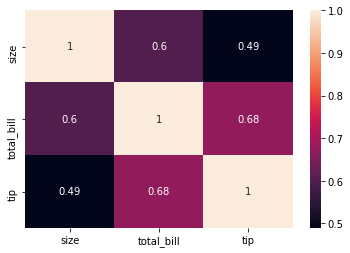

In [48]:
sns.heatmap(df2.corr(), annot=True)
plt.show()

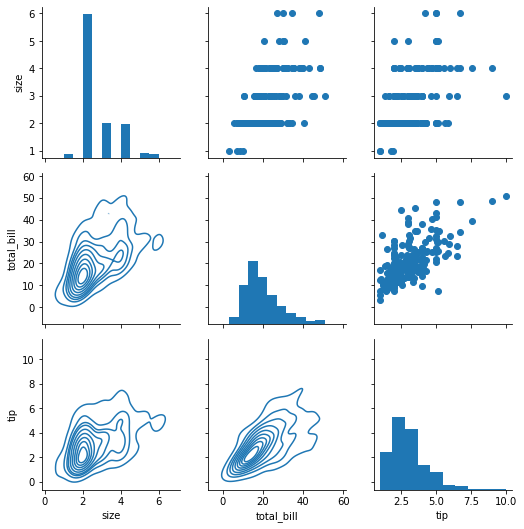

In [49]:
g = sns.PairGrid(df2)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)
plt.show()

In [50]:
X = df2[['total_bill', 'size']]
y = df2['tip']
lm_mr = OLS(y, sm.add_constant(X))
# lm_mr = OLS(df2['tip'], sm.add_constant(df2[['total_bill', 'size']]))
result = lm_mr.fit()

In [51]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     105.9
Date:                Thu, 14 Jan 2021   Prob (F-statistic):           9.67e-34
Time:                        20:00:36   Log-Likelihood:                -347.99
No. Observations:                 244   AIC:                             702.0
Df Residuals:                     241   BIC:                             712.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6689      0.194      3.455      0.0

## __Interpretation__

F-Test:
<br>
B1, B2 : P-Value of the Simultant test is below 0.05. We have enough evidence that minimum either totall bill or size affect tip that given to the food servers.
<br>
Partial Test:
1. B0 : P-Value of the partial test is below 0.05. B0 is the condition when total bill and size of the party has value of zero. in this case, it doesn't make sense that if there are people who paid food freely and size of the party zero. So, the interpretation is the model still need B0. 
1. B1 : P-Value of the partial test is below 0.05. With significant level of 5%, we have enough evidence that total bill increase tip that given to the food servers
1. B2 : P-Value of the partial test is below 0.05. With significant level of 5%, we have enough evidence that size of the party increase tip that given to the food servers

Parameter Estimate:
1. B0 = 0.689 : This is not meaningfull to be interpreted
1. B1 = 0.0927 : When the total bill increase 1 Dollar, the tip will increase about 0.0927 Dollar or When the total bill increase 10 Dollar, the tip will increase about 9.27 Dollar (*This interpretation only applied when total bill fall between 3.07 Dollar and 50.81 Dollar)
1. B2 = 0.1926 : When the size of the party increase 1 person, the tip will increase about 0.1926 Dollar(*This interpretation only applied when size of the party fall between 1 and 6) 
1. It is strongly recommended to interprete within the interval of predictor and no changes in another variable

Coefficient Determination:
<br>
R-Square adj = 46.3% : This model can explain 46.3% variation of tips.
<br>
(* by adding size of the party the coefficient determination increase from 45.7% to 46.3%)

In [52]:
df2.describe()

,size,total_bill,tip
count,244.000000,244.000000,244.000000
mean,2.569672,19.785943,2.998279
std,0.951100,8.902412,1.383638
min,1.000000,3.070000,1.000000
25%,2.000000,13.347500,2.000000
50%,2.000000,17.795000,2.900000
75%,3.000000,24.127500,3.562500
max,6.000000,50.810000,10.000000


In [53]:
mr = LinearRegression()
mr.fit(X, y)
print('Slope:', mr.coef_)
print('Intercept:', mr.intercept_)
print('R2:', mr.score(X,y))

Slope: [0.09271334 0.19259779]
Intercept: 0.6689447408125022
R2: 0.46786930879612587


In [54]:
# meja 01, terdapat 3 orang / customer dengan total bill $45, berapakah tips?
mr.predict([[45, 3]])

array([5.41883828])

In [55]:
df2['prediction'] = mr.predict(X)
df2

<ipython-input-55-174535da768c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['prediction'] = mr.predict(X)


,size,total_bill,tip,prediction
0,2,16.99,1.01,2.629340
1,3,10.34,1.66,2.205394
2,3,21.01,3.50,3.194645
3,2,23.68,3.31,3.249592
4,4,24.59,3.61,3.719157
...,...,...,...,...
239,3,29.03,5.92,3.938206
240,2,27.18,2.00,3.574089
241,2,22.67,2.00,3.155952
242,2,17.82,1.75,2.706292


In [56]:
mse_mr = mean_squared_error(df2['tip'], df2['prediction'])
rmse_mr = np.sqrt(mse_mr)
print('MSE:', mse_mr)
print('RMSE:', rmse_mr)

MSE: 1.014564905610028
RMSE: 1.007256127114662


# Python Excercise :  Diagnostics and Collinearity

C:\Users\johan\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


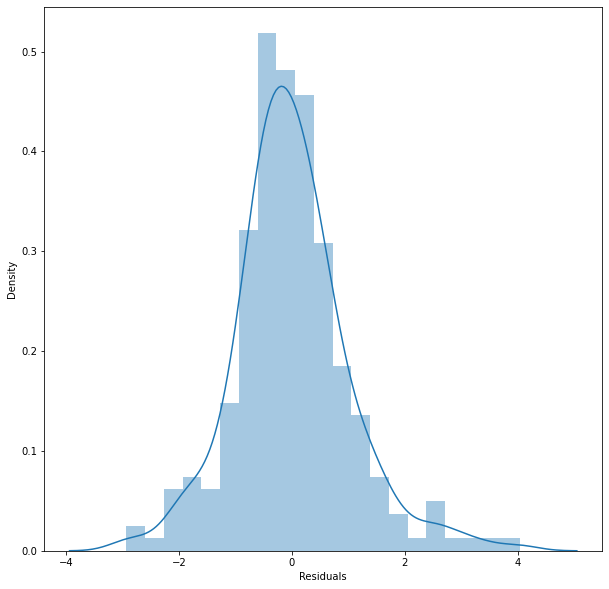

In [57]:
plt.figure(figsize=(10,10))
sns.distplot(result.resid)
plt.xlabel('Residuals')
plt.show()

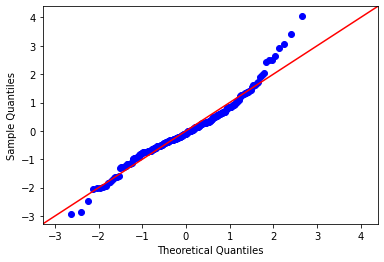

In [58]:
sm.qqplot(result.resid, line='45')
plt.show()

## Gauss-Markov Assumption

C:\Users\johan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\johan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Residuals')

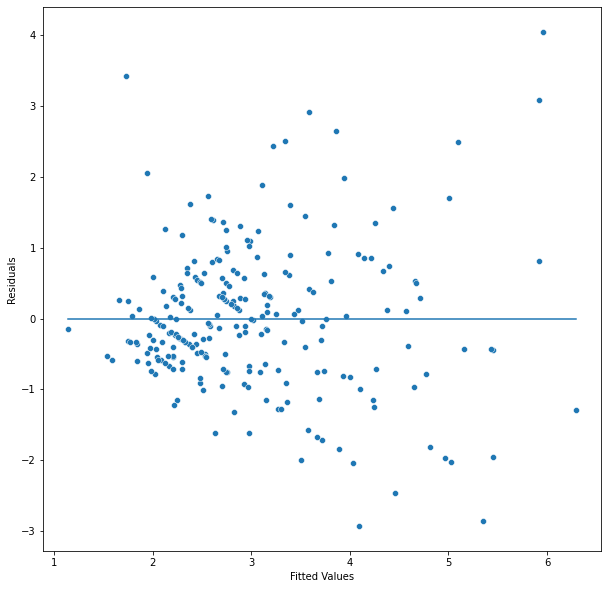

In [59]:
plt.figure(figsize=(10,10))
sns.scatterplot(result.fittedvalues, result.resid)
sns.lineplot(result.fittedvalues,0)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')

## __Multicol__

In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [61]:
def calc_vif(x):
    
    vif = pd.DataFrame()
    vif['variables'] = x.columns
    vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    
    return vif

In [62]:
calc_vif(df2[['total_bill', 'size']])

,variables,VIF
0,total_bill,8.684373
1,size,8.684373


Assumption Assesment:
1. If we refer to the histogram, the residual seemed normally distributed
1. Model residuals gather around zero
1. No certain pattern in the residual plot
1. Homoscedasticity Occur
1. vif is not acceptable : this is make sense because there should be relationship between size and total bill. So, actually we only need either total bill or size.

> ## Dummy Variable Preprocessing

In [63]:
# tips.drop(['xi-mean', '(xi-mean)squared'], axis=1, inplace=True)
tips.drop(['prediction'], axis=1, inplace=True)
tips

,total_bill,tip,sex,smoker,day,time,size,xi-mean,(xi-mean)squared
0,16.99,1.01,Female,No,Sun,Dinner,2,-2.795943,7.817295
1,10.34,1.66,Male,No,Sun,Dinner,3,-9.445943,89.225832
2,21.01,3.50,Male,No,Sun,Dinner,3,1.224057,1.498316
3,23.68,3.31,Male,No,Sun,Dinner,2,3.894057,15.163683
4,24.59,3.61,Female,No,Sun,Dinner,4,4.804057,23.078967
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,9.244057,85.452597
240,27.18,2.00,Female,Yes,Sat,Dinner,2,7.394057,54.672084
241,22.67,2.00,Male,Yes,Sat,Dinner,2,2.884057,8.317787
242,17.82,1.75,Male,No,Sat,Dinner,2,-1.965943,3.864930


In [64]:
tips_dummy = pd.get_dummies(tips, drop_first=True, columns = ['sex', 'smoker', 'day', 'time'])
tips_dummy

,total_bill,tip,size,xi-mean,(xi-mean)squared,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,16.99,1.01,2,-2.795943,7.817295,1,1,0,0,1,1
1,10.34,1.66,3,-9.445943,89.225832,0,1,0,0,1,1
2,21.01,3.50,3,1.224057,1.498316,0,1,0,0,1,1
3,23.68,3.31,2,3.894057,15.163683,0,1,0,0,1,1
4,24.59,3.61,4,4.804057,23.078967,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,9.244057,85.452597,0,1,0,1,0,1
240,27.18,2.00,2,7.394057,54.672084,1,0,0,1,0,1
241,22.67,2.00,2,2.884057,8.317787,0,0,0,1,0,1
242,17.82,1.75,2,-1.965943,3.864930,0,1,0,1,0,1


In [65]:
fitur = 'total_bill size sex_Female smoker_No day_Fri day_Sat day_Sun time_Dinner'.split()
target = 'tip'

lm_dum = OLS(tips_dummy[target], sm.add_constant(tips_dummy[fitur]))
result = lm_dum.fit()

In [66]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     26.06
Date:                Thu, 14 Jan 2021   Prob (F-statistic):           1.20e-28
Time:                        20:00:37   Log-Likelihood:                -347.48
No. Observations:                 244   AIC:                             713.0
Df Residuals:                     235   BIC:                             744.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.5908      0.256      2.310      

> ## Assumption

we will asses some assumption and check the multicollinearity
1. Normality
1. Gauss-Markov
1. Multicollinearity

C:\Users\johan\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Residuals')

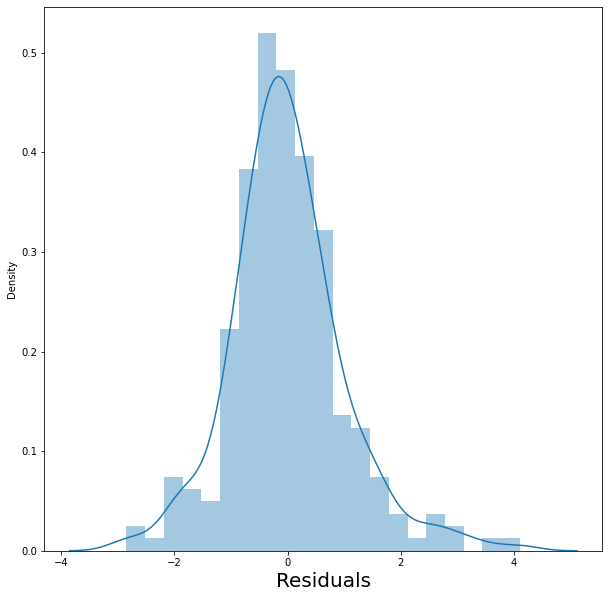

In [67]:
plt.figure(figsize=(10,10))
sns.distplot(result.resid)
plt.xlabel('Residuals', fontsize=20)

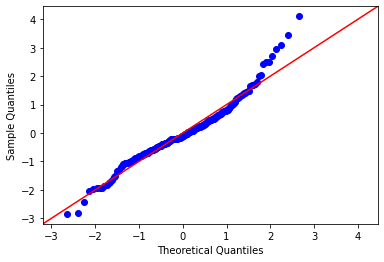

In [68]:
sm.qqplot(result.resid, line='45')
plt.show()

C:\Users\johan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\johan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Residuals')

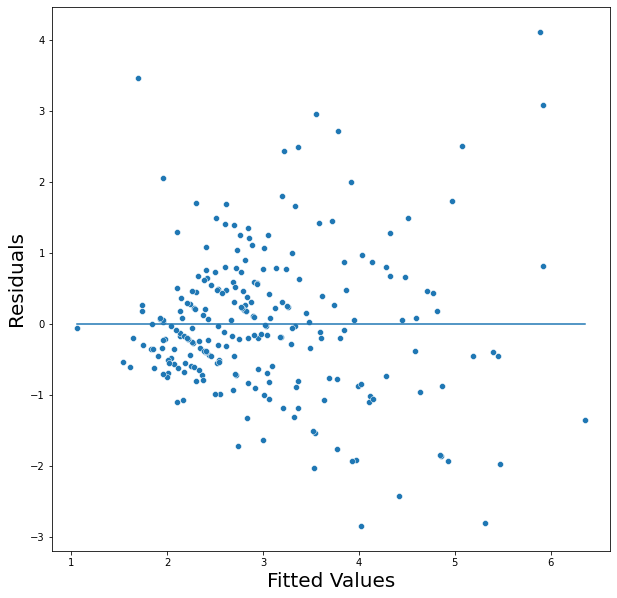

In [69]:
plt.figure(figsize=(10,10))
sns.scatterplot(result.fittedvalues, result.resid)
sns.lineplot(result.fittedvalues, 0)
plt.xlabel('Fitted Values', fontsize=20)
plt.ylabel('Residuals', fontsize=20)

MULTICOL

In [70]:
calc_vif(tips_dummy[fitur])

,variables,VIF
0,total_bill,9.443197
1,size,12.048233
2,sex_Female,1.479481
3,smoker_No,2.635550
4,day_Fri,2.559699
5,day_Sat,17.730443
6,day_Sun,15.810322
7,time_Dinner,33.150259


Assumption Assesment:
1. If we refer to the histogram, the residual seemed normally distributed
1. Model residuals gather around zero
1. No certain pattern in the residual plot
1. Homoscedasticity Occur
1. vif is not acceptable : this is make sense because there should be relationship between size and total bill. So, actually we only need either total bill or size. time dinner has the highest value of vif, it's reasonable if we exclude time dinner from model.

In [71]:
fitur = 'total_bill sex_Female smoker_No day_Fri day_Sat day_Sun'.split()
target = 'tip'
lm_dum2 = OLS(tips_dummy[target], sm.add_constant(tips_dummy[fitur]))
result = lm_dum2.fit()

In [72]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.448
Method:                 Least Squares   F-statistic:                     33.81
Date:                Thu, 14 Jan 2021   Prob (F-statistic):           2.35e-29
Time:                        20:00:38   Log-Likelihood:                -349.51
No. Observations:                 244   AIC:                             713.0
Df Residuals:                     237   BIC:                             737.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7819      0.238      3.285      0.0

In [73]:
calc_vif(tips_dummy[fitur])

,variables,VIF
0,total_bill,3.670370
1,sex_Female,1.439580
2,smoker_No,2.228945
3,day_Fri,1.175956
4,day_Sat,1.985433
5,day_Sun,2.068751


## __Tujuan Awal Penelitian__

1. Untuk prediksi:
    - Multicol bukan masalah besar
    - R2 yang paling tinggi, RMSE yang paling kecil
2. Analisa relationship:
    - Multicol
    - R2 sinyal
    - Homogen

In [74]:
fitur

['total_bill', 'sex_Female', 'smoker_No', 'day_Fri', 'day_Sat', 'day_Sun']

In [75]:
lr_dm = LinearRegression()
X = tips_dummy[fitur]
y = tips_dummy[target]

# 35.3, Male, bukan perokok, jumat
lr_dm.fit(X, y)
lr_dm.predict([[35.3, 0, 1, 1, 0, 0]])

array([4.74503248])

In [76]:
tips_dummy_all_k = pd.get_dummies(tips, columns = ['sex', 'smoker', 'day', 'time'])
tips_dummy_all_k[['sex_Male', 'sex_Female']].corr()

,sex_Male,sex_Female
sex_Male,1.0,-1.0
sex_Female,-1.0,1.0


In [77]:
tips_dummy_all_k.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   total_bill        244 non-null    float64
 1   tip               244 non-null    float64
 2   size              244 non-null    int64  
 3   xi-mean           244 non-null    float64
 4   (xi-mean)squared  244 non-null    float64
 5   sex_Male          244 non-null    uint8  
 6   sex_Female        244 non-null    uint8  
 7   smoker_Yes        244 non-null    uint8  
 8   smoker_No         244 non-null    uint8  
 9   day_Thur          244 non-null    uint8  
 10  day_Fri           244 non-null    uint8  
 11  day_Sat           244 non-null    uint8  
 12  day_Sun           244 non-null    uint8  
 13  time_Lunch        244 non-null    uint8  
 14  time_Dinner       244 non-null    uint8  
dtypes: float64(4), int64(1), uint8(10)
memory usage: 12.0 KB


In [78]:
tips_dummy_all_k.drop(['sex_Male', 'day_Sun', 'time_Lunch'], axis=1)

,total_bill,tip,size,xi-mean,(xi-mean)squared,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,time_Dinner
0,16.99,1.01,2,-2.795943,7.817295,1,0,1,0,0,0,1
1,10.34,1.66,3,-9.445943,89.225832,0,0,1,0,0,0,1
2,21.01,3.50,3,1.224057,1.498316,0,0,1,0,0,0,1
3,23.68,3.31,2,3.894057,15.163683,0,0,1,0,0,0,1
4,24.59,3.61,4,4.804057,23.078967,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,9.244057,85.452597,0,0,1,0,0,1,1
240,27.18,2.00,2,7.394057,54.672084,1,1,0,0,0,1,1
241,22.67,2.00,2,2.884057,8.317787,0,1,0,0,0,1,1
242,17.82,1.75,2,-1.965943,3.864930,0,0,1,0,0,1,1


In [79]:
tips_dummy_all_k[['day_Thur', 'day_Fri', 'day_Sat', 'day_Sun']].corr()

,day_Thur,day_Fri,day_Sat,day_Sun
day_Thur,1.000000,-0.169608,-0.434480,-0.392566
day_Fri,-0.169608,1.000000,-0.216319,-0.195451
day_Sat,-0.434480,-0.216319,1.000000,-0.500682
day_Sun,-0.392566,-0.195451,-0.500682,1.000000


In [80]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,xi-mean,(xi-mean)squared
0,16.99,1.01,Female,No,Sun,Dinner,2,-2.795943,7.817295
1,10.34,1.66,Male,No,Sun,Dinner,3,-9.445943,89.225832
2,21.01,3.50,Male,No,Sun,Dinner,3,1.224057,1.498316
3,23.68,3.31,Male,No,Sun,Dinner,2,3.894057,15.163683
4,24.59,3.61,Female,No,Sun,Dinner,4,4.804057,23.078967
